In [15]:
import numpy as np
import os
import pandas as pd
from numpy import random as r
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from numpy import random as r

from pylab import *
from IPython.core.pylabtools import figsize

import seaborn as sns
import matplotlib.cm as cm

import sys
# sys.path.insert(0, '../../utils')
# import splicing_utils as spu
# import single_cell_plots as scp
# from single_cell_plots import *

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import comb

mpl.rcParams["mathtext.fontset"] = "stix"
# mpl.rcParams['pdf.fonttype'] = 42
from tqdm import tqdm_notebook as tqdm

import scipy.integrate as integrate
import scipy.special as special

In [2]:
# def probability_psi (psi_o, psi, c, r):
#     suma = 0
#     for m in range(r, np.int(10*r/c)):
#         comb_1 = comb(m*psi, r*psi_o)
#         comb_2 = comb(m*(1-psi), r*(1-psi_o))
#         proba_1 = c**(r+1)
#         proba_2 = (1-c)**(m-r)
        
#         suma += comb_1*comb_2*proba_1*proba_2
        
    
#     return suma

def probability_psi(psi_o, psi, c, r):
    m_array = np.arange(r, np.int(10*r/c))
    return sum_on_m(m_array, psi_o, psi, c, r)

def sum_on_m(m_array, psi_o, psi, c, r):
    comb_1 = comb(m_array*psi, r*psi_o)
    comb_2 = comb(m_array*(1-psi), r*(1-psi_o))
    proba_1 = c**(r+1)
    proba_2 = (1-c)**(m_array-r)
    
    prob_array = comb_1*comb_2*proba_1*proba_2
    
    return np.sum(prob_array)

In [3]:
# def probability_psi_m_known (psi_o, psi, c, m):
#     suma = 0
#     #print(psi)
#     for r in range(1, m+1):
#         #print('hola')
#         comb_1 = comb(m*psi, r*psi_o)
#         comb_2 = comb(m*(1-psi), r*(1-psi_o))
#         proba_1 = c**r
#         proba_2 = (1-c)**(m-r)
                
#         suma += comb_1*comb_2*proba_1*proba_2/(1-(1-c)**m)
        
    
#     return suma

def probability_psi_m_known (psi_o, psi, c, m):

    r = np.arange(1, m+1)
    
    comb_1 = comb(m*psi, r*psi_o)
    comb_2 = comb(m*(1-psi), r*(1-psi_o))
    proba_1 = c**r
    proba_2 = (1-c)**(m-r)

    prob_array = comb_1*comb_2*proba_1*proba_2/(1-(1-c)**m)
        
    
    return np.sum(prob_array)

In [4]:
def probability_binary_m_known(m, c, psi):
    return probability_psi_m_known(1, psi, c, m) + probability_psi_m_known(0, psi, c, m)

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

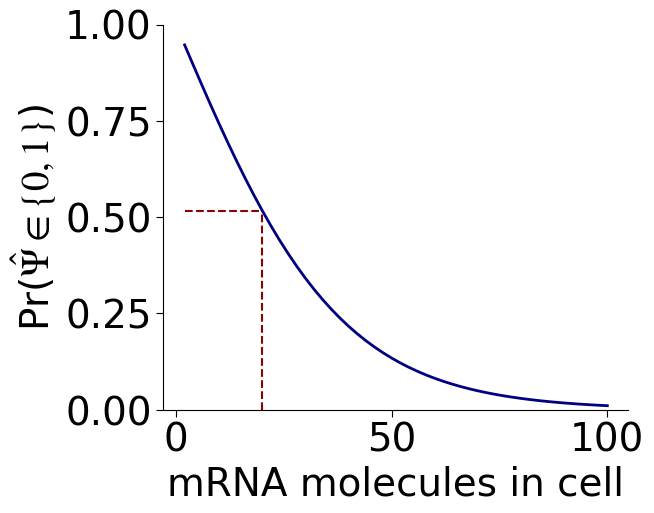

In [5]:
import importlib
# importlib.reload(scp)
# importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

fig = plt.figure(figsize=(6,5))

ax  = plt.subplot(1,1,1)



#plt.legend(frameon=False,  prop={'size': 18})

plt.xlabel('mRNA molecules in cell', fontsize=28)
plt.ylabel('Pr($\hat{\Psi} \in \{0, 1\}$)', fontsize=28)

plt.ylim((0,1))

ylocs = np.array([1, 0.75, 0.5, 0.25, 0])
ynewLabels = np.array(['1.00', '0.75', '0.50', '0.25', '0.00'])
plt.yticks(ylocs, ynewLabels, rotation=0)

ax.tick_params(labelsize=28)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)

ax.xaxis.set_tick_params(length=5)
ax.yaxis.set_tick_params(length=5)

ax.plot(range(2,101, 2), [probability_binary_m_known(m, 0.1, 0.5) for m in range(2, 101, 2)], linewidth=2, c='navy')
ax.plot([2, 20], [probability_binary_m_known(20, 0.1, 0.5), probability_binary_m_known(20, 0.1, 0.5)], '--', c='darkred')
ax.plot([20, 20], [0, probability_binary_m_known(20, 0.1, 0.5)], '--', c='darkred')

# plt.savefig('plots/supplementary_figure_2c_binary_m_known.pdf', bbox_inches='tight', transparent=True)
# plt.savefig('plots/supplementary_figure_2c_binary_m_known.svg', bbox_inches='tight', transparent=True)
# plt.savefig('plots/supplementary_figure_2c_binary_m_known.png', bbox_inches='tight', transparent=True)

plt.show()

In [6]:
binary_hm = []
for r in range (2, 26):
    rvec_binary = []
    for psi in np.arange(0.01, 0.51, 0.01):
        proba_binary = probability_psi(1, psi, 0.1, r)
        proba_binary += probability_psi(0, psi, 0.1, r)
        rvec_binary.append(proba_binary)
        
    binary_hm.append(rvec_binary)

In [7]:
binary_hm = np.array(binary_hm)
binary_hm_df = pd.DataFrame(binary_hm, columns=[round(x, 3) for x in np.arange(0.01, 0.51, 0.01)], index=range(2, 26))
#binary_hm_df[binary_hm_df.columns[::-1]]

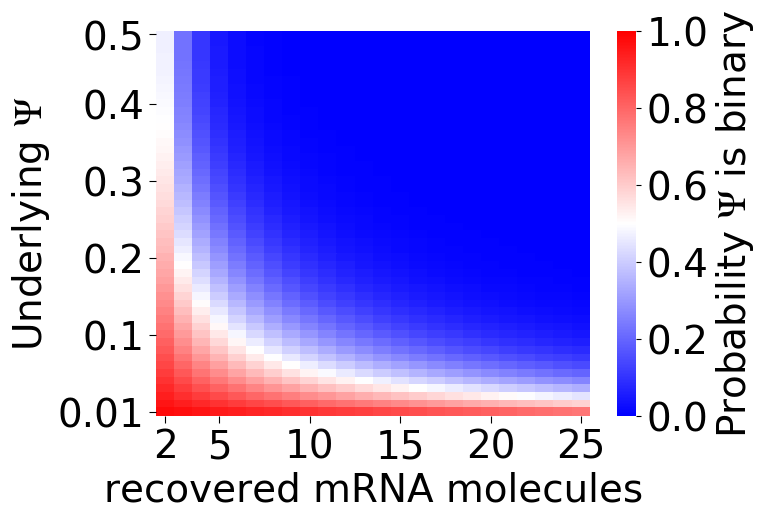

In [9]:
fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)
ax = sns.heatmap(binary_hm_df[binary_hm_df.columns[::-1]].T, cmap='bwr', vmin=0, vmax=1, 
                 cbar_kws={'label': "Probability $\Psi$ is binary",})
ax.figure.axes[-1].yaxis.label.set_size(28)


plt.xlabel('recovered mRNA molecules', fontsize=28)
plt.ylabel('Underlying $\Psi$', fontsize=28)

#locs, labels = plt.xticks()

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)


ylocs = np.array([49.5, 39.5, 29.5, 19.5, 9.5, 0.5])
ynewLabels = np.array(['0.01', '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.yticks(ylocs, ynewLabels)

ax.tick_params(labelsize=28)
ax.figure.axes[-1].tick_params(labelsize=28)
ax.figure.axes[-1].yaxis.label.set_size(28)

ax.xaxis.set_tick_params(length=5)
ax.yaxis.set_tick_params(length=5)


# plt.savefig('plots/simulation_0_counts_v_psi.pdf', bbox_inches='tight', transparent=True)
# plt.savefig('plots/simulation_0_counts_v_psi.svg', bbox_inches='tight', transparent=True)
# plt.savefig('plots/simulation_0_counts_v_psi.png', bbox_inches='tight', transparent=True)
plt.show()

In [17]:
# def auc(psi, min_p, max_p, c, r, res=0.01):
#     suma = 0
#     for i in np.arange(min_p, max_p+res, res):
#         suma += (probability_psi(i, psi, c, r)*res)
        
#     return suma

def auc(psi, min_p, max_p, c, r):
    return integrate.quad(probability_psi, min_p, max_p, args=(psi, c, r))[0]


def get_probability(psi, delta, c, r, total_proba=False):
    if not total_proba:
        total_proba = auc(psi, 0, 1, c, r)
    proba_delta = auc(psi, psi-delta, psi+delta, c, r)
    
    return proba_delta/total_proba

In [19]:
# hm_1 = []
# hm_01 = []
# hm_05 = []
# hm_25 = []
# hm_5 = []
# hm_9 = []
# #c = 0.1
# for r in range(2, 26):
#     r_vec_1 = []
#     r_vec_01 = []
#     r_vec_05 = []
#     r_vec_25 = []
#     r_vec_5 = []
#     r_vec_9 = []
#     for psi in np.arange(0.05, 0.55, 0.05):
#         #total_proba = auc(psi, 0, 1, c, r)
#         proba_1 = get_probability(psi, 0.1, 0.1, r,)#, total_proba=total_proba)
#         proba_01 = get_probability(psi, 0.1, 0.01, r)
#         proba_05 = get_probability(psi, 0.1, 0.05, r)
#         proba_25 = get_probability(psi, 0.1, 0.25, r)
#         proba_5 = get_probability(psi, 0.1, 0.5, r)
#         proba_9 = get_probability(psi, 0.1, 0.9, r)
#         r_vec_1.append(proba_1)
#         r_vec_01.append(proba_01)
#         r_vec_05.append(proba_05)
#         r_vec_25.append(proba_25)
#         r_vec_5.append(proba_5)
#         r_vec_9.append(proba_9)
#         print(psi)
#     hm_1.append(r_vec_1)
#     hm_01.append(r_vec_01)
#     hm_05.append(r_vec_05)
#     hm_25.append(r_vec_25)
#     hm_5.append(r_vec_5)
#     hm_9.append(r_vec_9)
#     print(r)

# # pd.DataFrame(np.array(hm_1)).to_csv('hm_1.tab', sep='\t')
# # pd.DataFrame(np.array(hm_01)).to_csv('hm_01.tab', sep='\t')
# # pd.DataFrame(np.array(hm_05)).to_csv('hm_05.tab', sep='\t')
# # pd.DataFrame(np.array(hm_9)).to_csv('hm_9.tab', sep='\t')
# # pd.DataFrame(np.array(hm_25)).to_csv('hm_25.tab', sep='\t')
# # pd.DataFrame(np.array(hm_5)).to_csv('hm_5.tab', sep='\t')

In [104]:
hm_01 = np.array(pd.read_csv('hm_01.tab', sep='\t', index_col=0))
hm_05 = np.array(pd.read_csv('hm_05.tab', sep='\t', index_col=0))
hm_1 = np.array(pd.read_csv('hm_1.tab', sep='\t', index_col=0))
hm_25 = np.array(pd.read_csv('hm_25.tab', sep='\t', index_col=0))
hm_5 = np.array(pd.read_csv('hm_5.tab', sep='\t', index_col=0))
hm_9 = np.array(pd.read_csv('hm_9.tab', sep='\t', index_col=0))

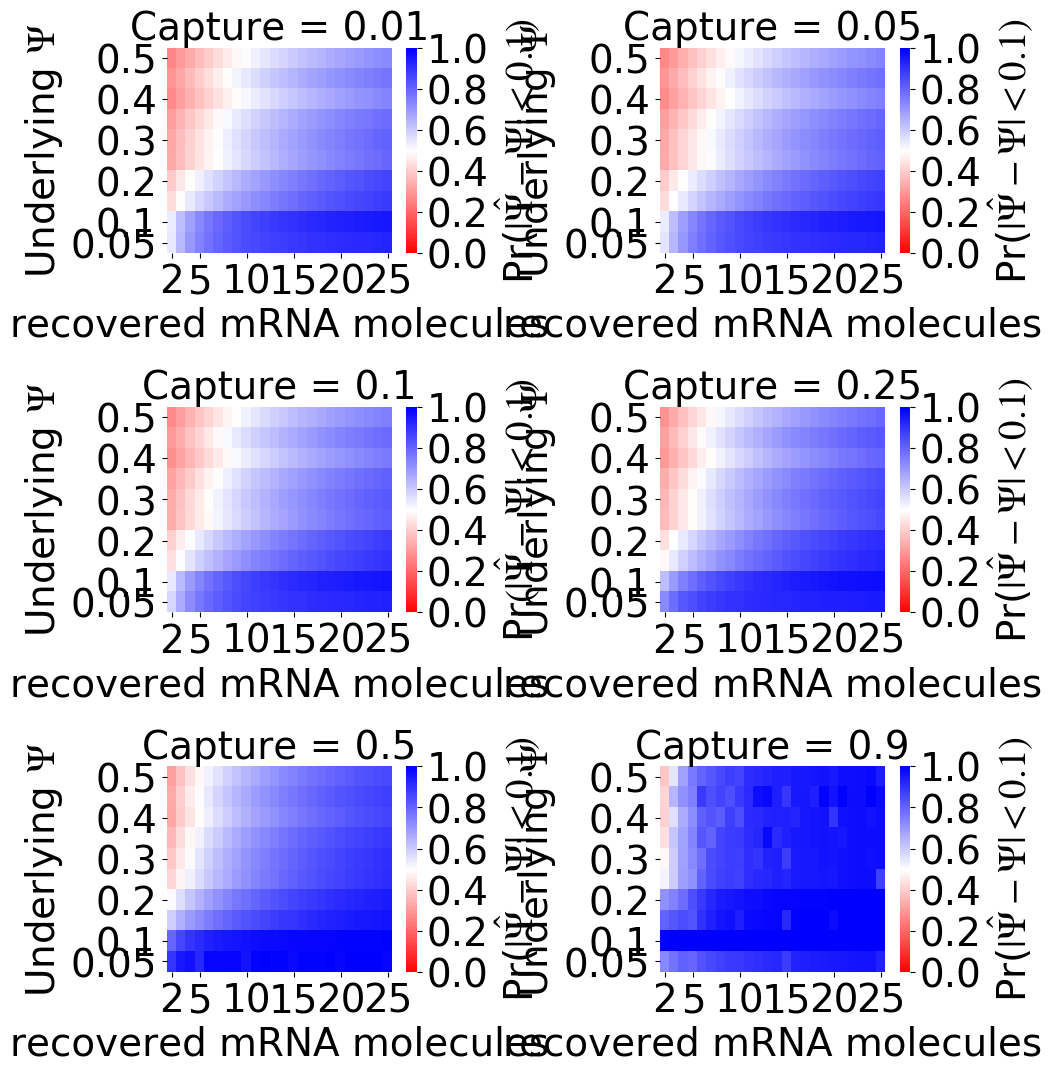

In [136]:
figsize(10,12)
fig = plt.figure()
#fig.tight_layout()
#fig.suptitle(title, fontsize=14)

gs = GridSpec(3,2)
gs.update(wspace=0.75, hspace=0.75)

ax = fig.add_subplot(gs[0,0])
sns.heatmap(hm_01.T[::-1], ax=ax, cmap='bwr_r', vmin=0, vmax=1, cbar_kws={'label': "Pr($|\hat{\Psi}-\Psi|<0.1)$",})

ax.figure.axes[-1].yaxis.label.set_size(38)


plt.xlabel('recovered mRNA molecules', fontsize=28)
plt.ylabel('Underlying $\Psi$', fontsize=28)
plt.title('Capture = 0.01', fontsize=28, y=1.01)

#locs, labels = plt.xticks()

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)


ylocs = np.array([9.5, 8.5, 6.5, 4.5,  2.5,  0.5])
ynewLabels = np.array(['0.05', '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.yticks(ylocs, ynewLabels, rotation=0)

ax.tick_params(labelsize=28)
ax.figure.axes[-1].tick_params(labelsize=28)
ax.figure.axes[-1].yaxis.label.set_size(28)


ax = fig.add_subplot(gs[0,1])
sns.heatmap(hm_05.T[::-1], ax=ax, cmap='bwr_r', vmin=0, vmax=1, cbar_kws={'label': "Pr($|\hat{\Psi}-\Psi|<0.1)$",})

ax.figure.axes[-1].yaxis.label.set_size(38)


plt.xlabel('recovered mRNA molecules', fontsize=28)
plt.ylabel('Underlying $\Psi$', fontsize=28)
plt.title('Capture = 0.05', fontsize=28, y=1.01)

#locs, labels = plt.xticks()

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)


ylocs = np.array([9.5, 8.5, 6.5, 4.5,  2.5,  0.5])
ynewLabels = np.array(['0.05', '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.yticks(ylocs, ynewLabels, rotation=0)

ax.tick_params(labelsize=28)
ax.figure.axes[-1].tick_params(labelsize=28)
ax.figure.axes[-1].yaxis.label.set_size(28)


ax = fig.add_subplot(gs[1,0])
sns.heatmap(hm_1.T[::-1], ax=ax, cmap='bwr_r', vmin=0, vmax=1, cbar_kws={'label': "Pr$(|\hat{\Psi}-\Psi|<0.1)$",})

ax.figure.axes[-1].yaxis.label.set_size(38)


plt.xlabel('recovered mRNA molecules', fontsize=28)
plt.ylabel('Underlying $\Psi$', fontsize=28)
plt.title('Capture = 0.1', fontsize=28, y=1.01)

#locs, labels = plt.xticks()

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)


ylocs = np.array([9.5, 8.5, 6.5, 4.5,  2.5,  0.5])
ynewLabels = np.array(['0.05', '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.yticks(ylocs, ynewLabels, rotation=0)

ax.tick_params(labelsize=28)
ax.figure.axes[-1].tick_params(labelsize=28)
ax.figure.axes[-1].yaxis.label.set_size(28)


ax = fig.add_subplot(gs[1,1])
sns.heatmap(hm_25.T[::-1], ax=ax, cmap='bwr_r', vmin=0, vmax=1, cbar_kws={'label': "Pr($|\hat{\Psi}-\Psi|<0.1)$",})

ax.figure.axes[-1].yaxis.label.set_size(38)


plt.xlabel('recovered mRNA molecules', fontsize=28)
plt.ylabel('Underlying $\Psi$', fontsize=28)
plt.title('Capture = 0.25', fontsize=28, y=1.01)

#locs, labels = plt.xticks()

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)


ylocs = np.array([9.5, 8.5, 6.5, 4.5,  2.5,  0.5])
ynewLabels = np.array(['0.05', '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.yticks(ylocs, ynewLabels, rotation=0)

ax.tick_params(labelsize=28)
ax.figure.axes[-1].tick_params(labelsize=28)
ax.figure.axes[-1].yaxis.label.set_size(28)


ax = fig.add_subplot(gs[2,0])
sns.heatmap(hm_5.T[::-1], ax=ax, cmap='bwr_r', vmin=0, vmax=1, cbar_kws={'label': "Pr($|\hat{\Psi}-\Psi|<0.1)$",})

ax.figure.axes[-1].yaxis.label.set_size(38)


plt.xlabel('recovered mRNA molecules', fontsize=28)
plt.ylabel('Underlying $\Psi$', fontsize=28)
plt.title('Capture = 0.5', fontsize=28, y=1.01)

#locs, labels = plt.xticks()

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)


ylocs = np.array([9.5, 8.5, 6.5, 4.5,  2.5,  0.5])
ynewLabels = np.array(['0.05', '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.yticks(ylocs, ynewLabels, rotation=0)

ax.tick_params(labelsize=28)
ax.figure.axes[-1].tick_params(labelsize=28)
ax.figure.axes[-1].yaxis.label.set_size(28)


ax = fig.add_subplot(gs[2,1])
sns.heatmap(hm_9.T[::-1], ax=ax, cmap='bwr_r', vmin=0, vmax=1, cbar_kws={'label': "Pr($|\hat{\Psi}-\Psi|<0.1)$",})

ax.figure.axes[-1].yaxis.label.set_size(38)


plt.xlabel('recovered mRNA molecules', fontsize=28)
plt.ylabel('Underlying $\Psi$', fontsize=28)
plt.title('Capture = 0.9', fontsize=28, y=1.01)

#locs, labels = plt.xticks()

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)


ylocs = np.array([9.5, 8.5, 6.5, 4.5,  2.5,  0.5])
ynewLabels = np.array(['0.05', '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.yticks(ylocs, ynewLabels, rotation=0)

ax.tick_params(labelsize=28)
ax.figure.axes[-1].tick_params(labelsize=28)
ax.figure.axes[-1].yaxis.label.set_size(28)


plt.savefig('plots/supplementary_figure_2b_uncertainty.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots/supplementary_figure_2b_uncertainty.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots/supplementary_figure_2b_uncertainty.png', bbox_inches='tight', transparent=True)


plt.show()

In [76]:
import time as t

def lhood_intervals(c, r, psi_hat):
#     Likelihood intervals of splicing model
#     c: capture efficiency
#     r: number of observed molecules
#     psi_hat: the observed exon inclusion rate
#     The returned valus are:
#     [l1,l2]: the minimum and maximum values for the "real" psi whose likelihood (or posterior, assuming a uniform prior) 
#              is within 95% of the MLE (or MAP)
#     mx: The MLE (which is identical to psi_hat). It is also MAP if we have a uniform prior.
#     ent: the entropy of the posterior with a uniform prior
    interval_cutoff=0.9
    psi_arr=np.arange(0.005, 1.005, 0.005)
    lhood_arr = []
    
#     tiempo = t.time()

#     print(len(psi_arr))
    for i in range(len(psi_arr)):
        lhood_arr.append(lhood_intg_m(c,r,psi_arr[i],psi_hat))
        
#     print(t.time()-tiempo)
    
    lhood_arr = np.array(lhood_arr)
    inds = ~np.isnan(lhood_arr)
    
    if np.all(np.isnan(lhood_arr)):
        l1 = np.nan
        l2 = np.nan
        mx = np.nan
        ent = np.nan
        
    else:
        
        top_inds = [i for i in range(len(lhood_arr)) if (lhood_arr[i] >= (interval_cutoff * np.max(lhood_arr[inds])))]
#         print(np.min(top_inds))
        l1 = psi_arr[np.min(top_inds)]
        l2 = psi_arr[np.max(top_inds)]
        
        mx_idx = np.argmax(lhood_arr)
        mx = psi_arr[mx_idx]
        
        p=lhood_arr[inds]
        p=1/sum(p)
        ent=p*np.log(p)
    
    return l1,l2,mx,ent


from scipy.special import gammaln

def nch_apprx(n, j):
    res = gammaln(n+1)-gammaln(j+1)-gammaln(n-j+1)
    return res


def lhood_intg_m(c, r, psi, psi_hat):
    # Computes Pr(psi_hat | psi,r,c)
    # c: capture efficiency
    # r: number of observed molecules
    # psi_hat: the observed exon inclusion rate
    # psi: the real exon inclusion rate 
    
    normalizing_f=1/c
    cum_pr=0
#     print(r)
#     print(c)
#     print(5*round(r/c)+1)
#     tiempo = t.time()
    for num_transcripts in range(r, int(5*round(r/c)+1)):
        
        
        num_exon_in=round(num_transcripts*psi)
        num_exon_out=num_transcripts-num_exon_in
        r_exon_in=round(psi_hat*r)
        r_exon_out=r-r_exon_in

        
        
        token = (r_exon_in>num_exon_in) or (r_exon_out>num_exon_out) or (r>num_transcripts)
        token = token or (np.isinf(nch_apprx(num_transcripts,r))) or (r_exon_out<0) or (num_exon_out<0)
        
        if token:
            pr = 0
        else:
            
            suma = nch_apprx(num_exon_in,r_exon_in) + nch_apprx(num_exon_out,r_exon_out) 
            suma += (r*np.log(c)) + ( (num_transcripts-r) * np.log(1-c) ) -np.log(normalizing_f)
            pr = np.exp(suma)
            
        
        cum_pr = cum_pr + pr
        
        if (num_transcripts > (3*round(r/c))) and (pr<1e-12):
            break
         
    return cum_pr

In [80]:
c = 0.1
psi_hat_arr = np.arange(0, 0.51, 0.01)
r_arr = np.arange(2, 26)

interv_arr = []

for i in tqdm(range(len(r_arr))):
    psi_hat_arr1=np.arange(0, 0.51, 0.01)
    
    for j in range(1, len(psi_hat_arr)):
        
        
        if (psi_hat_arr[j-1]*r_arr[i]) == (psi_hat_arr[j]*r_arr[i]):
            psi_hat_arr1[j]=psi_hat_arr1[j-1]
            
    interv_arr_j = []
#     print(len(psi_hat_arr))
    for j in tqdm(range(len(psi_hat_arr))):
#         print(c)
#         print(r_arr[i])
#         print(psi_hat_arr1[j])
        l1,l2,mle,ent=lhood_intervals(c,r_arr[i],psi_hat_arr1[j])
        interv_arr_j.append(l2-l1)
    interv_arr.append(interv_arr_j)
        
        


# if any(any(isnan(interv_arr))),error('isnan');end
# colormap('hot');
# imagesc(interv_arr');
# xlabel('Number of reads (2 to 25)');
# ylabel('Observed psi (0 to 0.5)');


HBox(children=(IntProgress(value=0, max=24), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

HBox(children=(IntProgress(value=0, max=51), HTML(value='')))

In [83]:
pd.DataFrame(interv_arr).to_csv('MLE_PSI_estimates.tab', sep='\t', header=True, index=True)

In [89]:
interc_arr = pd.read_csv('MLE_PSI_estimates.tab', sep='\t', index_col=0)

In [ ]:
%Explore MLE, MAP uncertainties under different parametrization of the splicing model
addpath('functions');clear;clc;close all;

c=0.1; %Capture efficiency
psi_hat_arr=0:0.01:0.5; %Observed Psi
r_arr=2:25; %Observed number of transcripts

%Loop over all possible combinations of Psi_hat and number of observed transcripts 
interv_arr=[];
for i=1:length(r_arr)
    psi_hat_arr1=psi_hat_arr;
    for j=2:length(psi_hat_arr)
        %Correct Psi_hat to values that it can actually take (has to be fraction of
        %#observed transcripts)
        if psi_hat_arr(j-1)*r_arr(i) == psi_hat_arr(j)*r_arr(i)
            psi_hat_arr1(j)=psi_hat_arr1(j-1);
        end
    end
    for j=1:length(psi_hat_arr)
        [l1,l2,mle,ent]=lhood_intervals(c,r_arr(i),psi_hat_arr1(j));
        interv_arr(i,j)=l2-l1;
    end
end

if any(any(isnan(interv_arr))),error('isnan');end
colormap('hot');
imagesc(interv_arr');
xlabel('Number of reads (2 to 25)');
ylabel('Observed psi (0 to 0.5)');

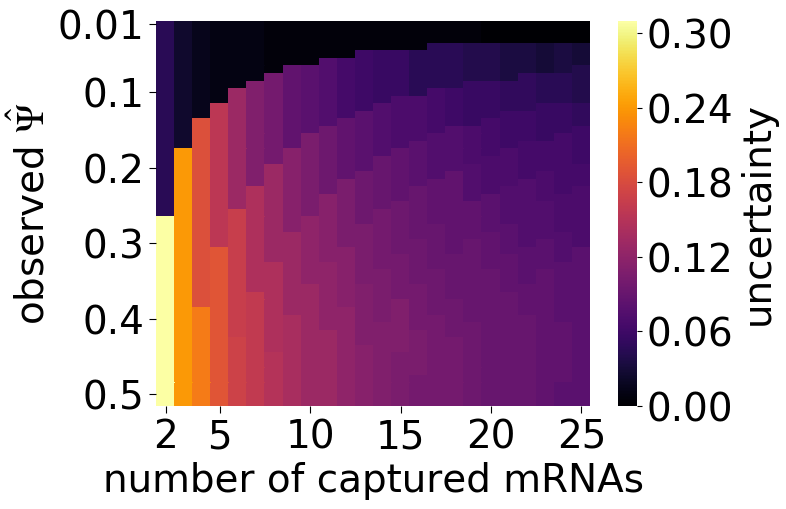

In [133]:
fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)

ax = sns.heatmap(pd.DataFrame(interv_arr).T, cmap=cm.inferno, cbar_kws={'label': "uncertainty",}, 
                 xticklabels=99)

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)

ylocs = np.array([49.5, 39.5, 29.5, 19.5, 9.5, 0.5])
ynewLabels = np.array(['0.5', '0.4', '0.3', '0.2', '0.1', '0.01'])
plt.yticks(ylocs, ynewLabels)

# plt.title('$\hat{\Psi}$ uncertainty', fontsize=28, y=1.01)
plt.xlabel('number of captured mRNAs', fontsize=28)
plt.ylabel('observed $\hat{\Psi}$', fontsize=28)


ax.tick_params(labelsize=28)
ax.figure.axes[-1].tick_params(labelsize=28)
ax.figure.axes[-1].yaxis.label.set_size(28)

ax.xaxis.set_tick_params(length=5)
ax.yaxis.set_tick_params(length=5)

plt.savefig('plots/observed_PSI_uncertainty.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots/observed_PSI_uncertainty.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots/observed_PSI_uncertainty.png', bbox_inches='tight', transparent=True)